# Imports ,Install

In [122]:
# %pip install requests beautifulsoup4 pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 892.0 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 858.0 kB/s eta 0:00:001m869.4 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 952.0 kB/s eta 0:00:001m1.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 656.5 kB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


# Single Page

In [114]:
import pandas as pd
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import json

i = 12
url = f"https://u.today/views/ajax?_wrapper_format=drupal_ajax&view_name=taxonomy_term&view_display_id=page_1&view_args=2594&view_path=/taxonomy/term/2594&view_base_path=taxonomy/term/%&view_dom_id=1d822821cc8c53db8460244f22ad82fb6023b96b79f59b3b41863ac12c0ef518&pager_element=0&page={i}&_drupal_ajax=1&ajax_page_state[theme]=cryptod&ajax_page_state[theme_token]=&ajax_page_state[libraries]=cryptod/global-styling,paragraphs/drupal.paragraphs.unpublished,system/base,views/views.module,views_infinite_scroll/views-infinite-scroll"
req = requests.get(url)
print(req.status_code)



# cleaning
def split_time(string):
    date_obj = datetime.strptime(string, "%b %d, %Y - %H:%M")
    return [date_obj.year,date_obj.month,date_obj.day,date_obj.hour]
 
def tags_find(html):
    list_tags = [i.text.strip() for i in html.find_all("a")]
    return ",".join(list_tags)



data = json.loads(req.text)
data[1]["data"]
soup = BeautifulSoup(data[1]["data"], "html.parser")

# extract
years = [split_time(i.text)[0] for i in soup.find_all("div", attrs={"class" : "humble"})]
months = [split_time(i.text)[1] for i in soup.find_all("div", attrs={"class" : "humble"})]
days = [split_time(i.text)[2] for i in soup.find_all("div", attrs={"class" : "humble"})]
hours = [split_time(i.text)[3] for i in soup.find_all("div", attrs={"class" : "humble"})]
titles = [i.text for i in soup.find_all("div", attrs={"class" : "news__item-title"})]
names = [i.text.strip() for i in soup.find_all("div", attrs={"class" : "news__item-footer"})]
tags = [tags_find(i) for i in soup.find_all("div", attrs={"class" : "news__item-tags"})]
links = [i.attrs["href"] for i in soup.find_all("a", attrs={"class" : "news__item-body"})]


list_of_tuples = list(zip(years,
                          months,
                          days,
                          hours,
                          titles,
                          names,
                          tags,
                          links,
                          ))

df = pd.DataFrame(list_of_tuples, columns = ['years',
                                             "months",
                                             "days",
                                             "hours", 
                                             'titles',
                                             "names",
                                             "tags",
                                             "links"
                                             ])
df

200


,years,months,days,hours,titles,names,tags,links
0,2025,2,3,11,"1,000,000,000 DOGE In Past Five Hours As Price...",Yuri Molchan,"Dogecoin,Binance,Cryptocurrency Whales",https://u.today/1000000000-doge-in-past-five-h...
1,2025,2,3,11,Shiba Inu (SHIB) to Add Another Zero? 40% Pric...,Arman Shirinyan,Shiba Inu,https://u.today/shiba-inu-shib-to-add-another-...
2,2025,2,3,11,Peter Schiff Warns of 'Long Crypto Winter' as ...,Tomiwabold Olajide,"Peter Schiff,Bitcoin",https://u.today/peter-schiff-warns-of-long-cry...
3,2025,2,3,10,"Even at $80,000, Bitcoin Stays Bullish, Says V...",Gamza Khanzadaev,"Bitcoin,Bitcoin News,Peter Brandt,Bitcoin Pric...",https://u.today/even-at-80000-bitcoin-stays-bu...
4,2025,2,3,9,'Rich Dad Poor Dad' Author: Bitcoin Tanking in...,Yuri Molchan,"""Rich Dad, Poor Dad"" Author Robert Kiyosaki,Bi...",https://u.today/rich-dad-poor-dad-author-bitco...
5,2025,2,3,9,Cardano (ADA) Volume Skyrockets 428% Despite W...,Godfrey Benjamin,Cardano,https://u.today/cardano-ada-volume-skyrockets-...
6,2025,2,3,8,"Crypto Catastrophe: World Record Broken, Worst...",Arman Shirinyan,"Bitcoin,Ethereum",https://u.today/crypto-catastrophe-world-recor...
7,2025,2,3,6,Dormant Ethereum (ETH) Whale Deposited $228 Mi...,Alex Dovbnya,Ethereum News,https://u.today/dormant-ethereum-eth-whale-dep...
8,2025,2,3,5,$2.2 Billion Wiped Out as XRP and Other Altcoi...,Alex Dovbnya,XRP Price Prediction,https://u.today/22-billion-wiped-out-as-xrp-an...
9,2025,2,3,0,XRP Does It First Time in 2025: What's Next? D...,Arman Shirinyan,"XRP,Dogecoin,Ethereum",https://u.today/xrp-does-it-first-time-in-2025...


# Multi Page

In [ ]:
import pandas as pd
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import json


# def 
def split_time(string):
    date_obj = datetime.strptime(string, "%b %d, %Y - %H:%M")
    return [date_obj.year,date_obj.month,date_obj.day,date_obj.hour]

def tags_find(html):
    list_tags = [i.text.strip() for i in html.find_all("a")]
    return ",".join(list_tags)





MAX_NUM = 100
df = pd.DataFrame()

for i in range(1,MAX_NUM):
    url = f"https://u.today/views/ajax?_wrapper_format=drupal_ajax&view_name=taxonomy_term&view_display_id=page_1&view_args=2594&view_path=/taxonomy/term/2594&view_base_path=taxonomy/term/%&view_dom_id=1d822821cc8c53db8460244f22ad82fb6023b96b79f59b3b41863ac12c0ef518&pager_element=0&page={i}&_drupal_ajax=1&ajax_page_state[theme]=cryptod&ajax_page_state[theme_token]=&ajax_page_state[libraries]=cryptod/global-styling,paragraphs/drupal.paragraphs.unpublished,system/base,views/views.module,views_infinite_scroll/views-infinite-scroll"
    req = requests.get(url)
    print(f"{i}/{MAX_NUM}", req.status_code)







    data = json.loads(req.text)
    # data[1]["data"]
    soup = BeautifulSoup(data[1]["data"], "html.parser")

    # extract
    years = [split_time(i.text)[0] for i in soup.find_all("div", attrs={"class" : "humble"})]
    months = [split_time(i.text)[1] for i in soup.find_all("div", attrs={"class" : "humble"})]
    days = [split_time(i.text)[2] for i in soup.find_all("div", attrs={"class" : "humble"})]
    hours = [split_time(i.text)[3] for i in soup.find_all("div", attrs={"class" : "humble"})]
    titles = [i.text for i in soup.find_all("div", attrs={"class" : "news__item-title"})]
    names = [i.text.strip() for i in soup.find_all("div", attrs={"class" : "news__item-footer"})]
    tags = [tags_find(i) for i in soup.find_all("div", attrs={"class" : "news__item-tags"})]
    links = [i.attrs["href"] for i in soup.find_all("a", attrs={"class" : "news__item-body"})]


    list_of_tuples = list(zip(years,
                            months,
                            days,
                            hours,
                            titles,
                            names,
                            tags,
                            links,
                            ))

    df2 = pd.DataFrame(list_of_tuples, columns = ['years',
                                                "months",
                                                "days",
                                                "hours", 
                                                'titles',
                                                "names",
                                                "tags",
                                                "links"
                                                ])
    df = pd.concat([df, df2], ignore_index=True)

In [139]:
df.to_csv("ex.csv")

<Axes: ylabel='count'>

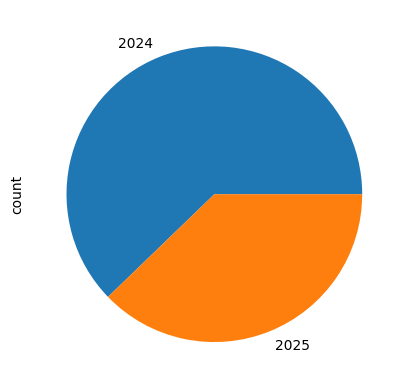

In [136]:
df["years"].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

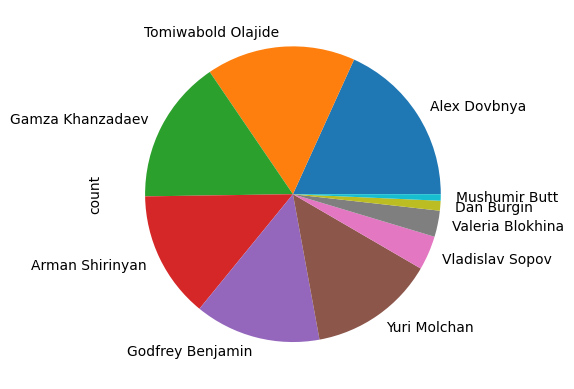

In [137]:
df["names"].value_counts().plot(kind="pie")